<a href="https://colab.research.google.com/github/chonginbilly/Moringa_DS/blob/Moringa_python/Data_Cleaning_Group_Asssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

from datetime import datetime

%matplotlib inline

In [ ]:
# Loading the dataset

data= pd.read_excel('/content/rollingsales_bronx.xlsx')
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1.0,A1,215000.0,2023-04-18
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1.0,A1,570000.0,2023-08-23
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1.0,0.0,1.0,1782.0,1548.0,1899.0,1.0,A1,0.0,2023-04-14
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,86,NaN,S0,2364 WASHINGTON AVENUE,NaN,...,1.0,2.0,3.0,1911.0,4080.0,1931.0,1.0,S0,0.0,2023-10-24
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2.0,0.0,2.0,1658.0,1428.0,1901.0,1.0,B9,350000.0,2023-06-26


In [ ]:
# Checking data types and non - nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         5611 non-null   int64         
 1   NEIGHBORHOOD                    5611 non-null   object        
 2   BUILDING CLASS CATEGORY         5611 non-null   object        
 3   TAX CLASS AT PRESENT            5611 non-null   object        
 4   BLOCK                           5611 non-null   int64         
 5   LOT                             5611 non-null   int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       5611 non-null   object        
 8   ADDRESS                         5611 non-null   object        
 9   APARTMENT NUMBER                548 non-null    object        
 10  ZIP CODE                        5611 non-null   int64         
 11  RESI

In [ ]:
# Dropping unnecessary columns
data.drop(['EASEMENT', 'APARTMENT NUMBER', 'ZIP CODE'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         5611 non-null   int64         
 1   NEIGHBORHOOD                    5611 non-null   object        
 2   BUILDING CLASS CATEGORY         5611 non-null   object        
 3   TAX CLASS AT PRESENT            5611 non-null   object        
 4   BLOCK                           5611 non-null   int64         
 5   LOT                             5611 non-null   int64         
 6   BUILDING CLASS AT PRESENT       5611 non-null   object        
 7   ADDRESS                         5611 non-null   object        
 8   RESIDENTIAL UNITS               4646 non-null   float64       
 9   COMMERCIAL UNITS                4143 non-null   float64       
 10  TOTAL UNITS                     4670 non-null   float64       
 11  LAND

In [ ]:
# Dropping Nan using the Year built columns
data['YEAR BUILT'] = pd.to_datetime(data['YEAR BUILT'], format = '%Y',errors='coerce')
data.dropna(subset = 'YEAR BUILT', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5002 entries, 0 to 5610
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         5002 non-null   int64         
 1   NEIGHBORHOOD                    5002 non-null   object        
 2   BUILDING CLASS CATEGORY         5002 non-null   object        
 3   TAX CLASS AT PRESENT            5002 non-null   object        
 4   BLOCK                           5002 non-null   int64         
 5   LOT                             5002 non-null   int64         
 6   BUILDING CLASS AT PRESENT       5002 non-null   object        
 7   ADDRESS                         5002 non-null   object        
 8   RESIDENTIAL UNITS               4039 non-null   float64       
 9   COMMERCIAL UNITS                3902 non-null   float64       
 10  TOTAL UNITS                     4066 non-null   float64       
 11  LAND

In [ ]:
# Filling the Residential units columns using the mean
residential_mean = data['RESIDENTIAL UNITS'].mean().round(0)
data['RESIDENTIAL UNITS'] = data['RESIDENTIAL UNITS'].fillna(residential_mean)

# Filling the Commercial units columns using the median
commercial_median = data['COMMERCIAL UNITS'].median().round(0)
data['COMMERCIAL UNITS'] = data['COMMERCIAL UNITS'].fillna(commercial_median)

# Cleaning the Total Units columns using the Residential and Commercial units
data['TOTAL UNITS'] = data['COMMERCIAL UNITS'] + data['RESIDENTIAL UNITS']

# Filling NAN values in the Land Square Feet using the median
land_median = data['LAND SQUARE FEET'].median()
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].fillna(land_median)

# Filling the NAN values of the Gross Square Feet using the median
gorss_median = data['GROSS SQUARE FEET'].median()
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].fillna(gorss_median)

# Renaming columns
data.rename(columns = {'BUILDING CLASS CATEGORY': 'BUILDING_CLASS_CATEGORY',
                       'TAX CLASS AT PRESENT': 'TAX_CLASS'}, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5002 entries, 0 to 5610
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         5002 non-null   int64         
 1   NEIGHBORHOOD                    5002 non-null   object        
 2   BUILDING CLASS CATEGORY         5002 non-null   object        
 3   TAX CLASS AT PRESENT            5002 non-null   object        
 4   BLOCK                           5002 non-null   int64         
 5   LOT                             5002 non-null   int64         
 6   BUILDING CLASS AT PRESENT       5002 non-null   object        
 7   ADDRESS                         5002 non-null   object        
 8   RESIDENTIAL UNITS               5002 non-null   float64       
 9   COMMERCIAL UNITS                5002 non-null   float64       
 10  TOTAL UNITS                     5002 non-null   float64       
 11  LAND

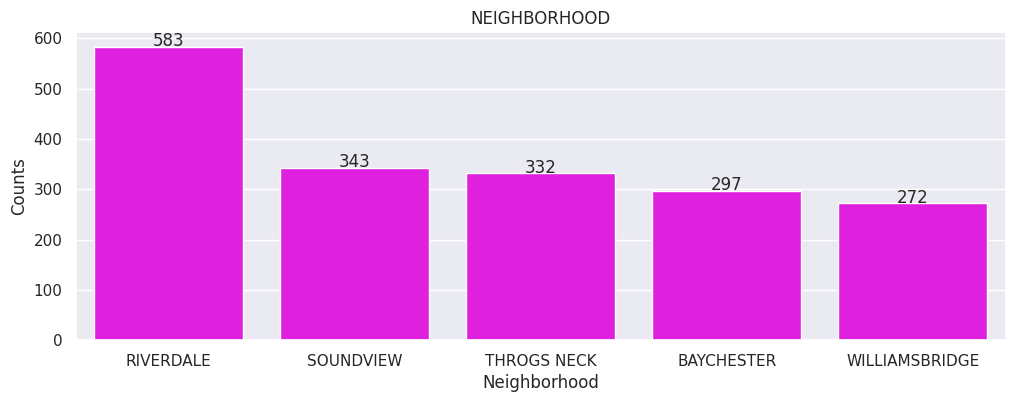

In [ ]:
# Plotting the Neighbourhood column
fig, ax = plt.subplots(figsize = (12,4))
neighbor = data['NEIGHBORHOOD'].value_counts()[:5]
sns.barplot(x = neighbor.index, y = neighbor.values, color = 'magenta')
plt.title('NEIGHBORHOOD')
plt.xlabel('Neighborhood')
plt.ylabel('Counts')

for i, j in enumerate(neighbor):
  ax.text(i, j+1, str(j), ha = ('center'))

plt.show()

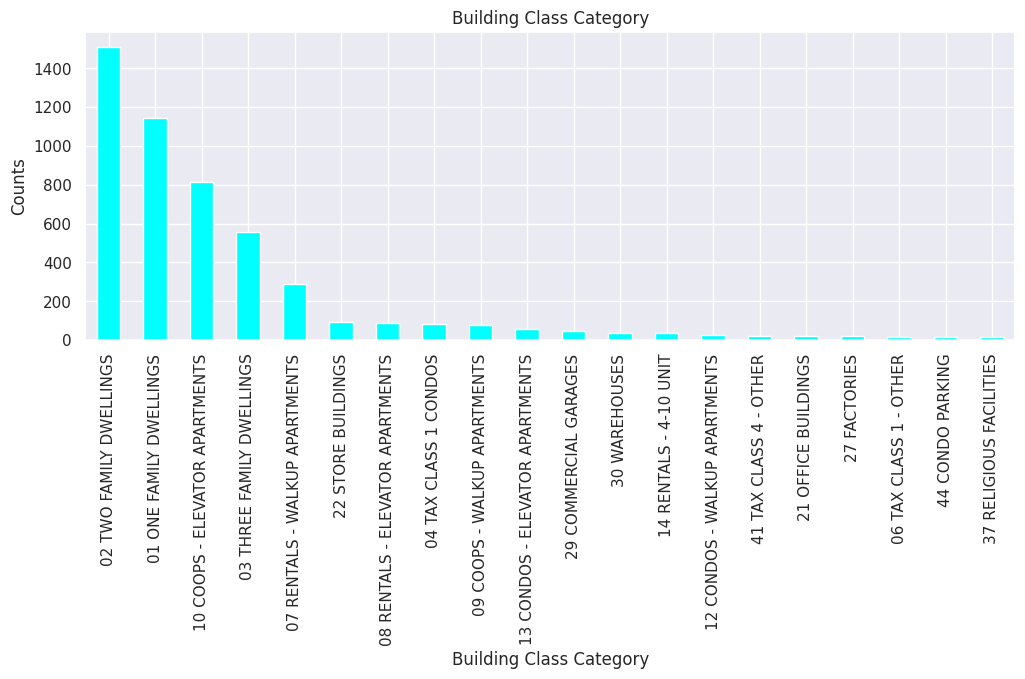

In [ ]:
# BUILDING_CLASS_CATEGORY
plt.figure(figsize = (12,4))
data['BUILDING_CLASS_CATEGORY'].value_counts()[:20].plot(kind = 'bar', color = 'cyan')
plt.title('Building Class Category')
plt.xlabel('Building Class Category')
plt.ylabel('Counts')
plt.show()

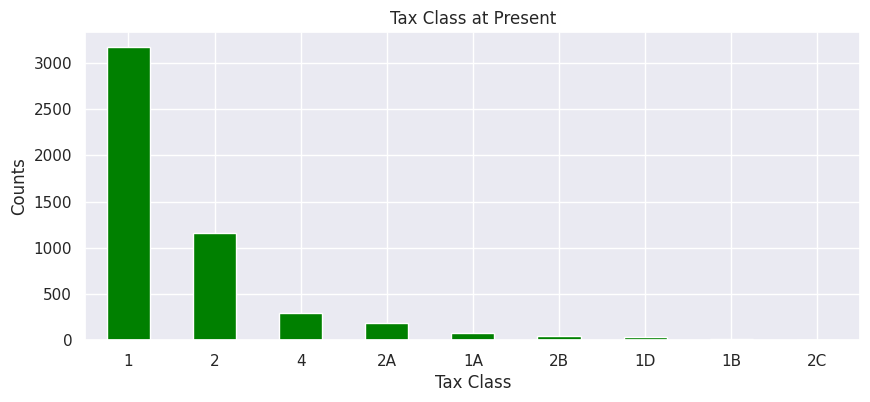

In [ ]:
# Tax Class at Present
plt.figure(figsize = (10,4))
data['TAX_CLASS'].value_counts().plot(kind = 'bar', color = 'green', rot = 0)
plt.title('Tax Class at Present')
plt.xlabel('Tax Class')
plt.ylabel('Counts')
plt.show()

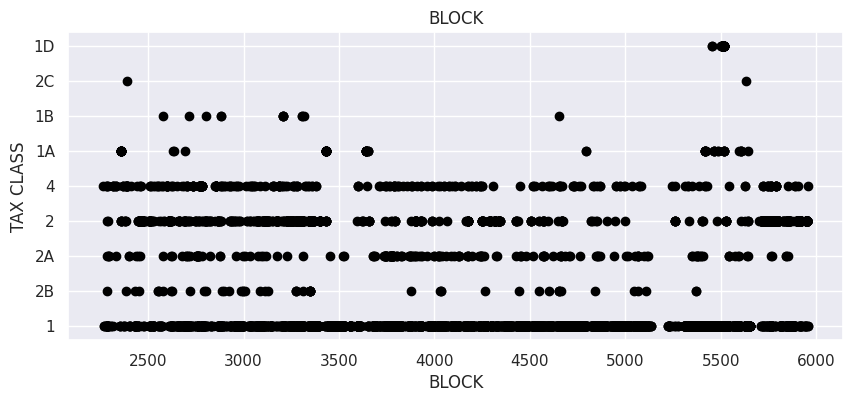

In [ ]:
# Plotting the BLOCK column
plt.figure(figsize = (10,4))
plt.scatter(x = data['BLOCK'], y = data['TAX_CLASS'], color = 'black')
plt.title('BLOCK')
plt.xlabel('BLOCK')
plt.ylabel('TAX CLASS')
plt.show()

In [ ]:
plt.figure(figsize = (10,4))
sns.violinplot(x='BLOCK', data=data, color = 'blue')
plt.title('BLOCK')
plt.xlabel('BLOCK')
plt.ylabel('Counts')
plt.show()

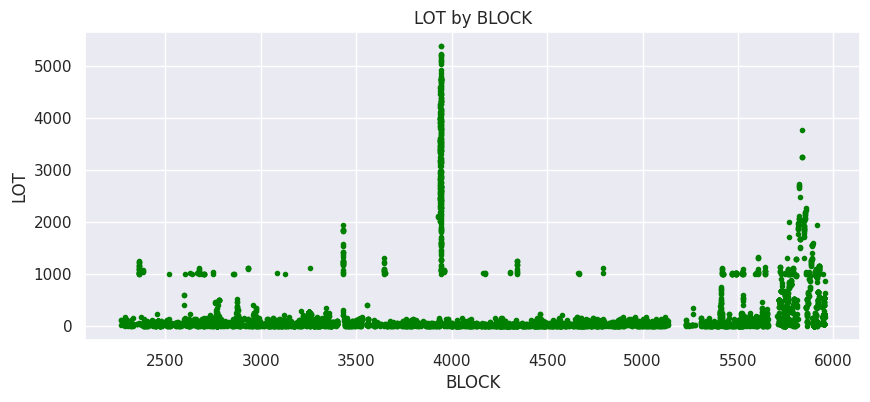

In [ ]:
plt.figure(figsize = (10,4))
plt.scatter(x = data['BLOCK'], y = data['LOT'], color = 'green', marker= '.')
plt.title('LOT by BLOCK')
plt.xlabel('BLOCK')
plt.ylabel('LOT')
plt.show()

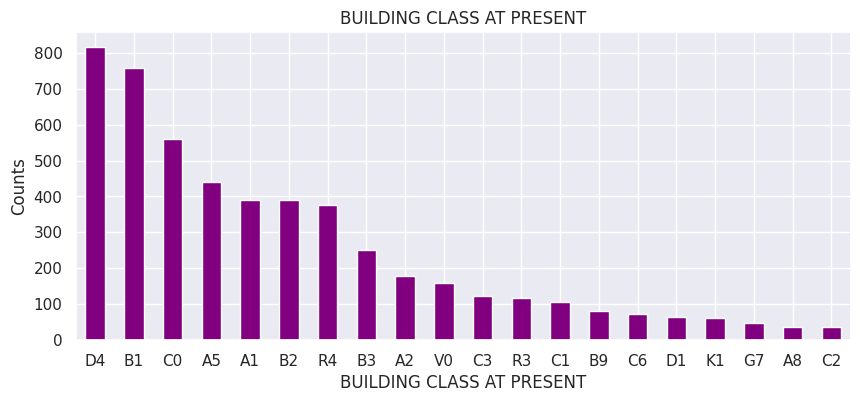

In [ ]:
plt.figure(figsize = (10,4))
data['BUILDING CLASS AT PRESENT'].value_counts()[:20].plot(kind = 'bar', color = 'purple', rot = 0)
plt.title('BUILDING CLASS AT PRESENT')
plt.xlabel('BUILDING CLASS AT PRESENT')
plt.ylabel('Counts')
plt.show()

In [ ]:
data['RESIDENTIAL UNITS'].isnull().sum()

965

4.0

1.0     1634
2.0     1526
4.0     1104
3.0      567
0.0      509
6.0       21
5.0       21
8.0       16
10.0      15
7.0       12
21.0       9
13.0       8
15.0       7
28.0       7
60.0       7
81.0       5
54.0       5
16.0       5
30.0       5
14.0       5
11.0       4
49.0       4
20.0       4
Name: RESIDENTIAL UNITS, dtype: int64

0.0      5202
1.0       252
2.0        61
3.0        34
252.0      19
4.0        14
5.0         9
6.0         8
10.0        6
9.0         3
12.0        1
7.0         1
23.0        1
Name: COMMERCIAL UNITS, dtype: int64

0

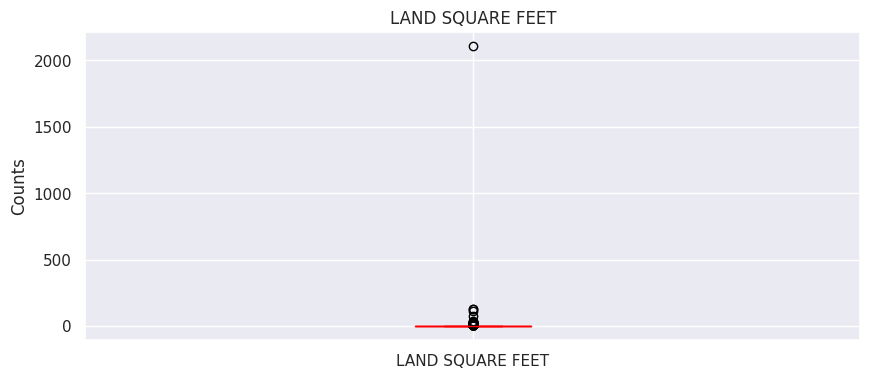

In [ ]:
plt.figure(figsize = (10,4))
land_median = data['LAND SQUARE FEET'].median()
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].fillna(land_median)
gorss_median = data['GROSS SQUARE FEET'].median()
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].fillna(gorss_median)
data['LAND SQUARE FEET'].value_counts().plot(kind = 'box', color = 'red')
plt.title('LAND SQUARE FEET')
plt.ylabel('Counts')
plt.show()

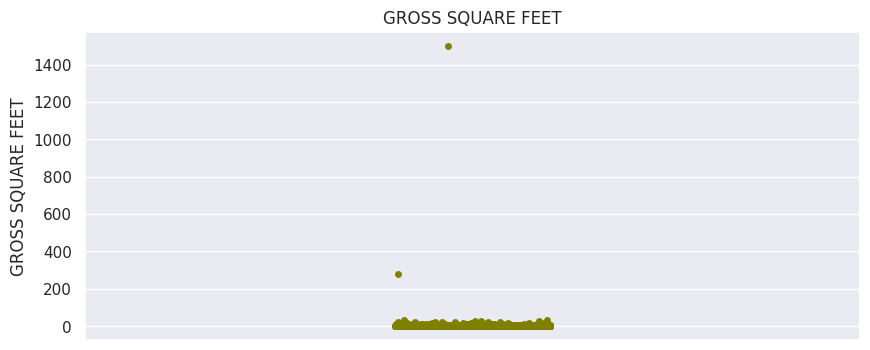

In [ ]:
plt.figure(figsize = (10,4))

gross_counts = data['GROSS SQUARE FEET'].value_counts()
sns.stripplot(gross_counts, color = 'olive')
plt.title('GROSS SQUARE FEET')
plt.show()

In [ ]:

data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899-01-01,1.0,A1,215000.0,2023-04-18
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899-01-01,1.0,A1,570000.0,2023-08-23
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1.0,0.0,1.0,1782.0,1548.0,1899-01-01,1.0,A1,0.0,2023-04-14
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,86,NaN,S0,2364 WASHINGTON AVENUE,NaN,...,1.0,2.0,3.0,1911.0,4080.0,1931-01-01,1.0,S0,0.0,2023-10-24
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2.0,0.0,2.0,1658.0,1428.0,1901-01-01,1.0,B9,350000.0,2023-06-26


In [ ]:
data[data['YEAR BUILT'].isnull()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
20,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3036,63,NaN,B1,457 EAST 179TH STREET,NaN,...,2.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
21,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3039,106,NaN,B1,442 EAST 185 STREET,NaN,...,2.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
22,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3040,15,NaN,B2,462 E 187TH ST,NaN,...,2.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
23,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3045,16,NaN,B3,2060 BATHGATE AVENUE,NaN,...,2.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
24,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3045,17,NaN,B2,2064 BATHGATE AVENUE,NaN,...,2.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5487,2,WILLIAMSBRIDGE,05 TAX CLASS 1 VACANT LAND,1B,4665,71,NaN,V0,724 EAST 218 STREET,NaN,...,0.0,0.0,0.0,2850.0,0.0,NaT,1.0,V0,225000.0,2023-02-09
5489,2,WILLIAMSBRIDGE,06 TAX CLASS 1 - OTHER,1,4861,26,NaN,G0,945 EAST 225 STREET,NaN,...,0.0,0.0,0.0,2725.0,0.0,NaT,1.0,G0,0.0,2023-06-01
5528,2,WILLIAMSBRIDGE,29 COMMERCIAL GARAGES,4,4660,18,NaN,G7,730 EAST 213 STREET,NaN,...,0.0,0.0,0.0,2000.0,0.0,NaT,4.0,G7,1300000.0,2023-07-06
5529,2,WILLIAMSBRIDGE,29 COMMERCIAL GARAGES,4,4664,34,NaN,G7,727 EAST 216 STREET,NaN,...,0.0,0.0,0.0,2854.0,0.0,NaT,4.0,G7,3025000.0,2023-02-01


In [ ]:
data.dropna(subset = 'YEAR BUILT', inplace = True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5002 entries, 0 to 5610
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         5002 non-null   int64         
 1   NEIGHBORHOOD                    5002 non-null   object        
 2   BUILDING CLASS CATEGORY         5002 non-null   object        
 3   TAX CLASS AT PRESENT            5002 non-null   object        
 4   BLOCK                           5002 non-null   int64         
 5   LOT                             5002 non-null   int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       5002 non-null   object        
 8   ADDRESS                         5002 non-null   object        
 9   APARTMENT NUMBER                188 non-null    object        
 10  ZIP CODE                        5002 non-null   int64         
 11  RESI

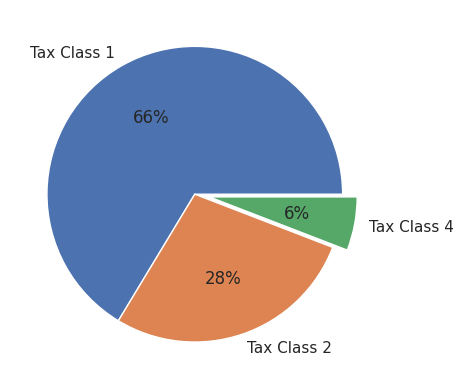

In [ ]:
tax_class = data['TAX CLASS AT TIME OF SALE'].value_counts()
plt.pie(tax_class, labels = ['Tax Class 1', 'Tax Class 2', 'Tax Class 4'], autopct = '%1.0f%%', explode = [0, 0, 0.1])
plt.show()

In [ ]:
data['BUILDING CLASS AT TIME OF SALE'].value_counts()

D4    0.163
B1    0.152
C0    0.111
A5    0.088
A1    0.079
B2    0.078
B3    0.050
A2    0.036
C3    0.025
C1    0.019
B9    0.016
R3    0.016
C6    0.015
K1    0.012
D1    0.012
R4    0.011
A8    0.008
C2    0.007
A9    0.006
S2    0.006
Name: BUILDING CLASS AT TIME OF SALE, dtype: float64

<Axes: >

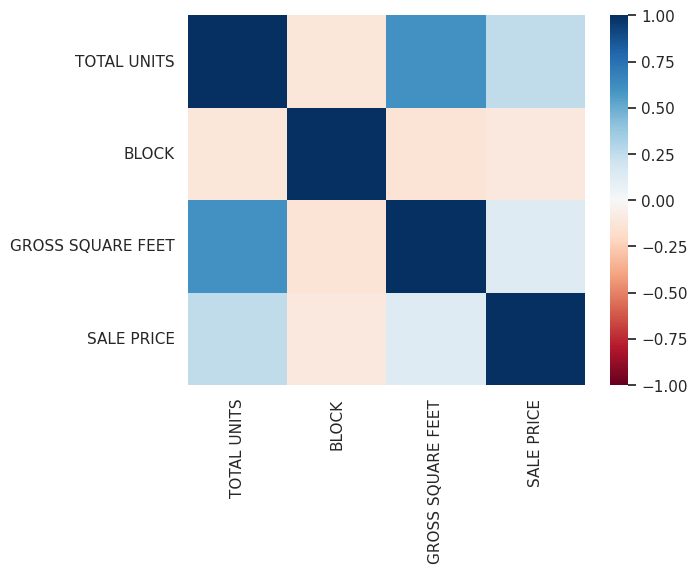

In [ ]:
data_corr = data[['TOTAL UNITS', 'BLOCK', 'GROSS SQUARE FEET', 'SALE PRICE']].corr()
sns.heatmap(data_corr, cmap = 'RdBu', vmin = -1, vmax = 1)

<Axes: xlabel='GROSS SQUARE FEET', ylabel='TOTAL UNITS'>

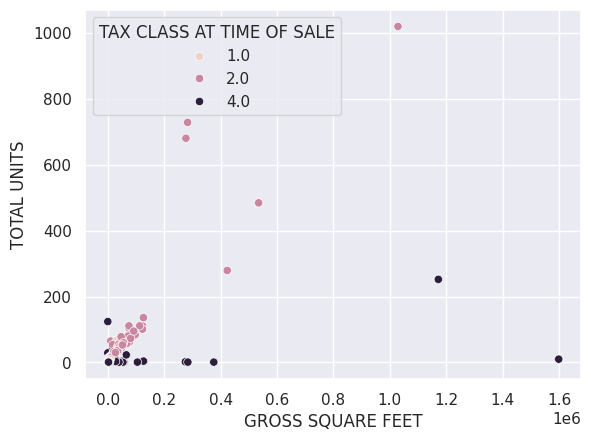

In [ ]:
sns.scatterplot(x = data['GROSS SQUARE FEET'], y = data['TOTAL UNITS'], hue = data['TAX CLASS AT TIME OF SALE'])

<Axes: xlabel='SALE DATE', ylabel='SALE PRICE'>

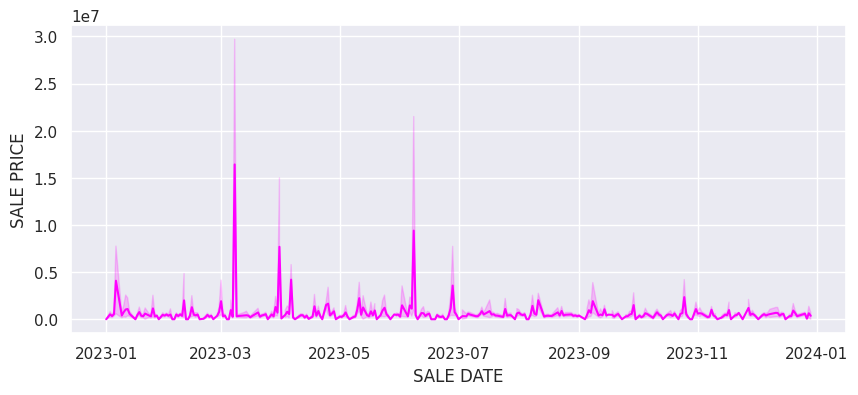

In [ ]:
plt.figure(figsize = (10,4))
sns.lineplot(y = data['SALE PRICE'], x = data['SALE DATE'], color = 'magenta')

<Axes: xlabel='SALE DATE', ylabel='TOTAL UNITS'>

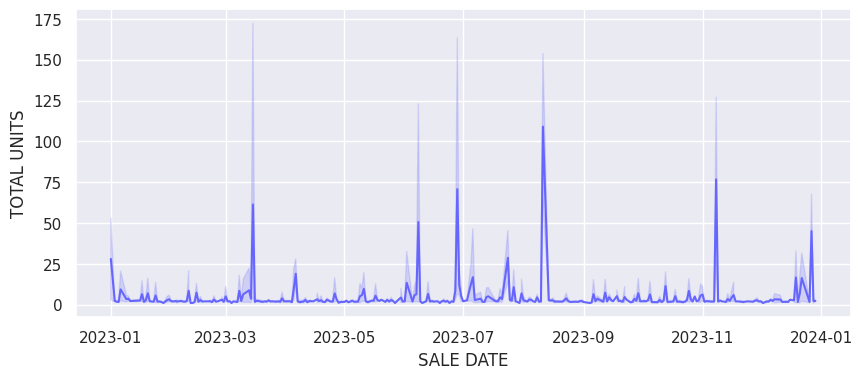

In [ ]:
plt.figure(figsize = (10,4))
sns.lineplot(y = data['TOTAL UNITS'], x = data['SALE DATE'], color = '#6666ff')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5002 entries, 0 to 5610
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         5002 non-null   int64         
 1   NEIGHBORHOOD                    5002 non-null   object        
 2   BUILDING CLASS CATEGORY         5002 non-null   object        
 3   TAX CLASS AT PRESENT            5002 non-null   object        
 4   BLOCK                           5002 non-null   int64         
 5   LOT                             5002 non-null   int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       5002 non-null   object        
 8   ADDRESS                         5002 non-null   object        
 9   APARTMENT NUMBER                188 non-null    object        
 10  ZIP CODE                        5002 non-null   int64         
 11  RESI